## First Movement: Periodic Defense with Poisson Attack Pattern

In [93]:
print("""This Cell is necessary or else my IDE will start running cells simultaneously which
      then leads to issues with unfinished imports""")

This Cell is necessary or else my IDE will start running cells simultaneously which
      then leads to issues with unfinished imports


In [94]:
import os
import logging
import numpy as np
from datetime import datetime
from scipy.stats import poisson

## New Stuff

In [ ]:
# Check if variables exist, otherwise default to False
image_mode = False

image_mode = globals().get('image_mode', False)
debug_mode = globals().get('debug_mode', False)
RUN_BASELINE_ONLY = globals().get('RUN_BASELINE_ONLY', False)

# If you are NOT using "extrapolate.ipynb" uncomment any you want to set to true
# however remember to re-comment them out later because otherwise extrapolate will be ignored
#image_mode = True
#debug_mode = True
#RUN_BASELINE_ONLY = True

print(f"Current settings: image_mode={image_mode}, debug_mode={debug_mode}, RUN_BASELINE_ONLY={RUN_BASELINE_ONLY}")

Current settings: image_mode=True, debug_mode=False, RUN_BASELINE_ONLY=False


In [96]:
# Define experiment name as a variable for easy modification
experiment_name = "experiment_1"

In [97]:
# Set up main logger (original)
log_path = os.path.join(os.getcwd(), f'{experiment_name}.log')
if os.path.exists(log_path):
    os.remove(log_path)
logger = logging.getLogger()
handler = logging.FileHandler(log_path, mode='w')
handler.setFormatter(logging.Formatter('%(message)s'))
logger.addHandler(handler)
logger.setLevel(logging.INFO)
logger.info(f'[1] "{experiment_name}.log"')
logger.info(f'[1] "{datetime.now().strftime("%a %b %d %H:%M:%S %Y")}"')

# Set up subgraph logger if not RUN_BASELINE_ONLY:
if not RUN_BASELINE_ONLY:
    subgraph_log_path = os.path.join(os.getcwd(), f'sub_{experiment_name}.log')
    if os.path.exists(subgraph_log_path):
        os.remove(subgraph_log_path)
    subgraph_handler = logging.FileHandler(subgraph_log_path, mode='w')
    subgraph_handler.setFormatter(logging.Formatter('%(message)s'))
    # Don't add to logger yet

# Function to switch between loggers
def switch_logger(use_subgraph_logger=False):
    # Remove all handlers
    for hdlr in logger.handlers[:]:
        logger.removeHandler(hdlr)
        
    # Add appropriate handler
    if use_subgraph_logger:
        logger.addHandler(subgraph_handler)
        logger.info(f'[1] "sub_{experiment_name}.log"')
        logger.info(f'[1] "{datetime.now().strftime("%a %b %d %H:%M:%S %Y")}"')
    else:
        logger.addHandler(handler)

In [98]:
# Global configuration
# This is the default weight value we will insert any time we we 
# need to insert a weight value for a trivial edge in the graph
# Why 0 ?  Because we have "hardness = exnp(-w)" so we get hardness = 1 for w = 0
# hardness = 1 means that edge is trivial to traverse
DEFAULT_WEIGHT_VALUE = 0  

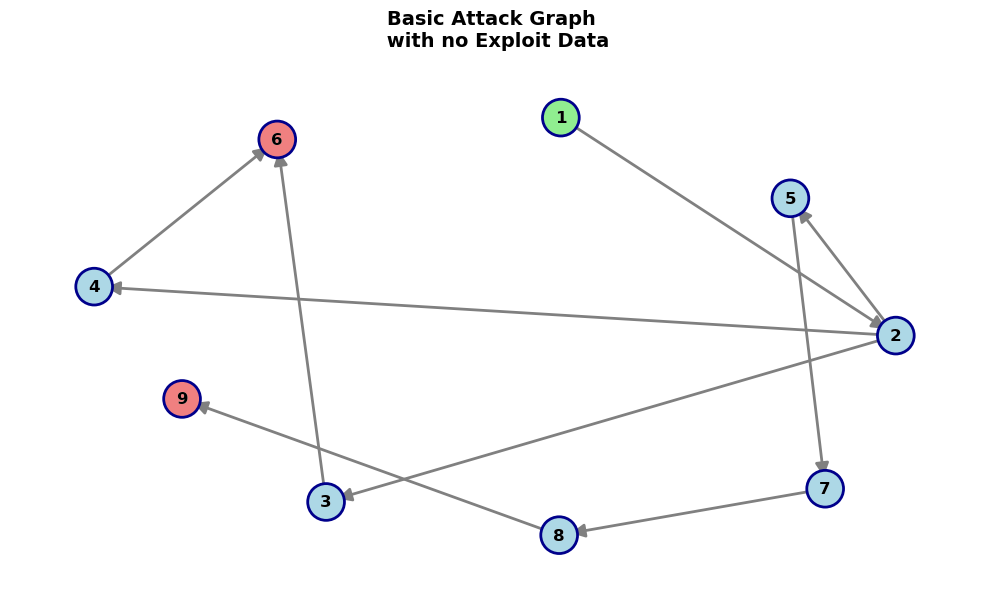

In [99]:
%run attack_graph_MARA.ipynb

### Create Subgraphs

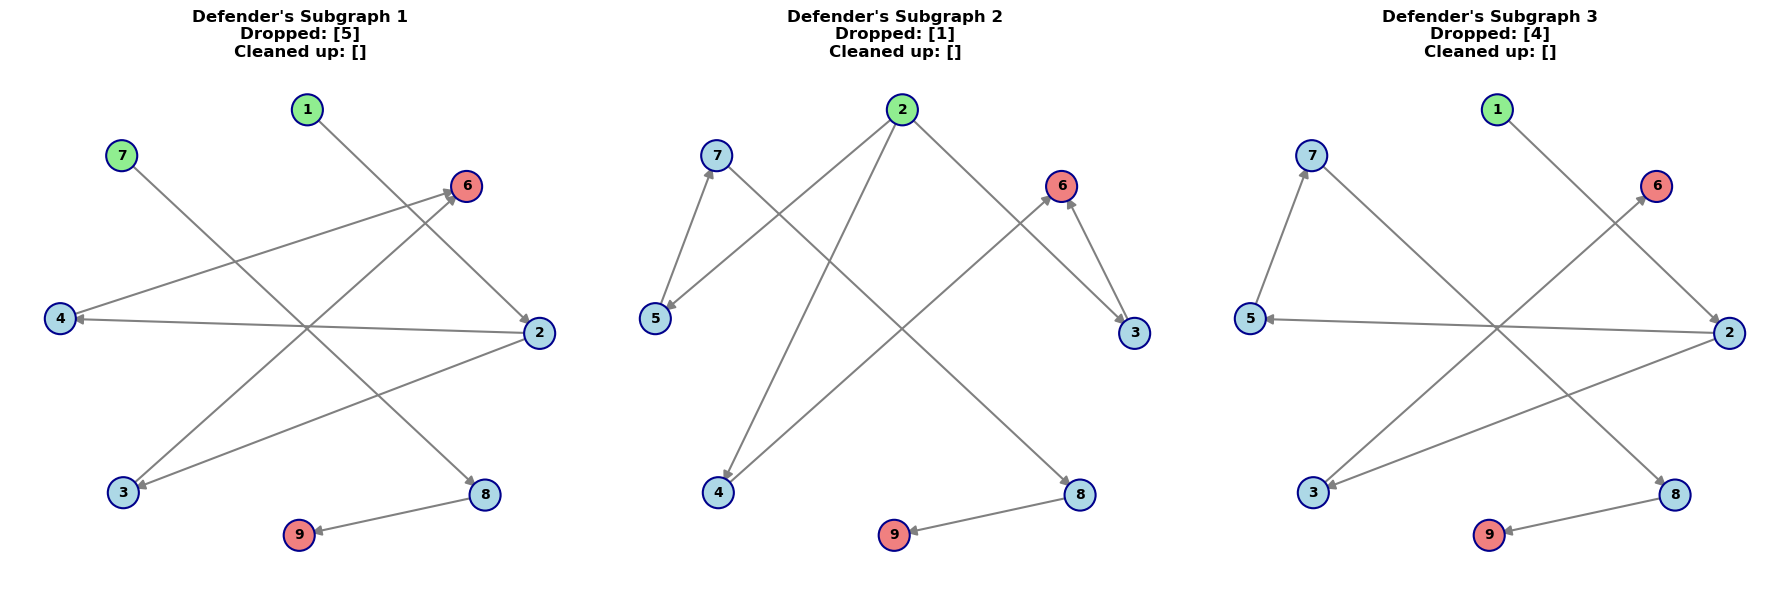

create subsgraph for defender concluded


In [100]:
# if given this will take current_drop_percentage from extrapolate as drop percentage
# if not it will default to 20%
%run create_subgraphs.ipynb

## Old Stuff

### Poisson Distribution Explanations

#### Base Formula

The Poisson distribution models the number of events occurring in a fixed interval. Its probability mass function is:

\begin{equation}
P(X=x) = \frac{\lambda^k}{k!} \cdot e^{-k}
\end{equation}

Where $\lambda$ is the average number of events per interval and $k$ is the count of events.

#### Basic Explanation


Definition of "λ" in our Specific Case
In this security model, $\lambda$ represents:

$\lambda = \text{expected number of exploits per time unit}$.

This corresponds to formula (10) in the paper.

Basic Explanation
Poisson distribution models attacker behavior with fixed defender checks:

$\lambda$ directly controls attacker's "aggressiveness" between defender checks.
- Higher $\lambda$ means attacker attempts more exploits (example: λ=2) in a given time period
- Lower $\lambda$ means fewer expected attack steps
- Most likely: taking λ (or λ-1) steps
- defense_rate not needed since checks happen at known times
- Key insight: periodic defender pattern means attacker only needs to worry about own speed
- This fits our intuition: when defender checks at predictable times, attacker can optimize their moves accordingly, focusing on maximizing progress during known safe periods.

In [101]:
attack_rate_list = [2]  
defense_rate_list = [0]

def random_steps(route, attack_rate=None, defense_rate=None, graph=None):
    length = len(route)
    if attack_rate is None:
        attack_rate = 2
    # Get PMF for values 0 to length-1
    pmf = poisson.pmf(np.arange(length), attack_rate)
    # Normalize (though poisson.pmf should already sum to ~1)
    pmf = pmf / pmf.sum()
    return pmf

In [102]:
# %run ctr-core_tests.ipynb
%run exp_ctr-core.ipynb
main()

We start with the baseline graph calculation!
Now we are going to run the subgraph analysis
The subgraph analysis is done!


In [103]:
with open(experiment_name+'.log', 'r') as f:
    print(f.read())

[1] "experiment_1.log"
[1] "Tue Mar 25 14:32:44 2025"



BASELINE RUN: BOTH ATTACKER AND DEFENDER HAVE FULL GRAPH KNOWLEDGE



++++++++++++++++++++++++++++++++

The virtual target nodeID is c(6,9)

attack rate =  2 , defense rate =  0 

	equilibrium for multiobjective security game (MOSG)

optimal defense strategy:
         prob.
2 0.000000e+00
3 2.798527e-01
4 2.798527e-01
5 0.000000e+00
7 0.000000e+00
8 4.402946e-01

worst case attack strategies per goal:
          1
1 0.3600737
2 0.3600737
3 0.2798527
[1] 0.128

Defender can keep attacker success below: 0.128
Attacker can guarantee success probability of: 0.128

